# MFCC_vgg16

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from keras import optimizers, losses, activations, models
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [25]:
training_dir = 'C:/Users/ASUS/Desktop/mMFCC/Train'
validation_dir = 'C:/Users/ASUS/Desktop/mMFCC/Valid'
test_dir = 'C:/Users/ASUS/Desktop/mMFCC/Test'

In [26]:
image_files = glob(training_dir + '/*/*.png')
valid_image_files = glob(validation_dir + '/*/*.png')

In [13]:
folders = glob(training_dir + '/*')
num_classes = len(folders)
print ('Total Classes = ' + str(num_classes))

Total Classes = 2


In [14]:
import tensorflow as tf 
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Flatten, Dense
#from keras.preprocessing import image

IMAGE_SIZE = [64, 64]  # we will keep the image size as (64,64). You can increase the size for better results. 

# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  # input_shape = (64,64,3) as required by VGG

for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
#x = Dense(128, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time.
x = Dense(num_classes, activation = 'softmax')(x)  # adding the output layer with softmax function as this is a multi label classification problem.

model = Model(inputs = vgg.input, outputs = x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [16]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

training_datagen = ImageDataGenerator(
                                    rescale=1./255,   # all pixel values will be between 0 an 1
                                    shear_range=0, 
                                    zoom_range=0,
                                    horizontal_flip=False,
                                    preprocessing_function=preprocess_input)

validation_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(rescale = 1./255, preprocessing_function=preprocess_input)

training_generator = training_datagen.flow_from_directory(training_dir, target_size = IMAGE_SIZE, batch_size = 200, class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size = IMAGE_SIZE, batch_size = 200, class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size = IMAGE_SIZE, batch_size = 200, class_mode = 'categorical')

Found 495 images belonging to 2 classes.
Found 145 images belonging to 2 classes.
Found 66 images belonging to 2 classes.


In [17]:
import tensorflow as tf
from keras.models import *
from keras.layers import *
opt = tf.optimizers.Adam(lr=1e-3)
model.compile(optimizer=opt, 
    loss=losses.binary_crossentropy, 
    metrics=['accuracy', 'Precision', 'AUC', tf.keras.metrics.Recall(), tf.keras.metrics.TrueNegatives()])

In [18]:
training_images = 495
validation_images = 145

history = model.fit(training_generator, # this should be equal to total number of images in training set. But to speed up the execution, I am only using 10000 images. Change this for better results. 
                   epochs = 100,  # change this for better results
                   validation_data = validation_generator)  # this should be equal to total number of images in validation set.

Epoch 1/100
3/3 [==============================] - 22s 9s/step - loss: 0.7053 - accuracy: 0.4707 - precision: 0.4707 - auc: 0.4454 - recall_1: 0.4707 - true_negatives_1: 233.0000 - val_loss: 0.6594 - val_accuracy: 0.7241 - val_precision: 0.7241 - val_auc: 0.8130 - val_recall_1: 0.7241 - val_true_negatives_1: 105.0000
Epoch 2/100
3/3 [==============================] - 17s 6s/step - loss: 0.6924 - accuracy: 0.5152 - precision: 0.5152 - auc: 0.5445 - recall_1: 0.5152 - true_negatives_1: 255.0000 - val_loss: 0.6489 - val_accuracy: 0.6207 - val_precision: 0.6207 - val_auc: 0.7332 - val_recall_1: 0.6207 - val_true_negatives_1: 90.0000
Epoch 3/100
3/3 [==============================] - 16s 7s/step - loss: 0.6747 - accuracy: 0.5535 - precision: 0.5535 - auc: 0.6298 - recall_1: 0.5535 - true_negatives_1: 274.0000 - val_loss: 0.6390 - val_accuracy: 0.6759 - val_precision: 0.6759 - val_auc: 0.8111 - val_recall_1: 0.6759 - val_true_negatives_1: 98.0000
Epoch 4/100
3/3 [============================

Epoch 27/100
3/3 [==============================] - 18s 7s/step - loss: 0.5398 - accuracy: 0.7596 - precision: 0.7596 - auc: 0.8157 - recall_1: 0.7596 - true_negatives_1: 376.0000 - val_loss: 0.6650 - val_accuracy: 0.5862 - val_precision: 0.5862 - val_auc: 0.6962 - val_recall_1: 0.5862 - val_true_negatives_1: 85.0000
Epoch 28/100
3/3 [==============================] - 17s 7s/step - loss: 0.5403 - accuracy: 0.7576 - precision: 0.7576 - auc: 0.8102 - recall_1: 0.7576 - true_negatives_1: 375.0000 - val_loss: 0.6795 - val_accuracy: 0.5793 - val_precision: 0.5793 - val_auc: 0.6907 - val_recall_1: 0.5793 - val_true_negatives_1: 84.0000
Epoch 29/100
3/3 [==============================] - 18s 7s/step - loss: 0.5366 - accuracy: 0.7576 - precision: 0.7576 - auc: 0.8174 - recall_1: 0.7576 - true_negatives_1: 375.0000 - val_loss: 0.6545 - val_accuracy: 0.5862 - val_precision: 0.5862 - val_auc: 0.7000 - val_recall_1: 0.5862 - val_true_negatives_1: 85.0000
Epoch 30/100
3/3 [=========================

Epoch 53/100
3/3 [==============================] - 15s 6s/step - loss: 0.5029 - accuracy: 0.7697 - precision: 0.7697 - auc: 0.8477 - recall_1: 0.7697 - true_negatives_1: 381.0000 - val_loss: 0.7140 - val_accuracy: 0.5862 - val_precision: 0.5862 - val_auc: 0.6799 - val_recall_1: 0.5862 - val_true_negatives_1: 85.0000
Epoch 54/100
3/3 [==============================] - 15s 6s/step - loss: 0.5027 - accuracy: 0.7697 - precision: 0.7697 - auc: 0.8468 - recall_1: 0.7697 - true_negatives_1: 381.0000 - val_loss: 0.7367 - val_accuracy: 0.5931 - val_precision: 0.5931 - val_auc: 0.6742 - val_recall_1: 0.5931 - val_true_negatives_1: 86.0000
Epoch 55/100
3/3 [==============================] - 17s 6s/step - loss: 0.5034 - accuracy: 0.7677 - precision: 0.7677 - auc: 0.8440 - recall_1: 0.7677 - true_negatives_1: 380.0000 - val_loss: 0.7301 - val_accuracy: 0.5931 - val_precision: 0.5931 - val_auc: 0.6778 - val_recall_1: 0.5931 - val_true_negatives_1: 86.0000
Epoch 56/100
3/3 [=========================

Epoch 79/100
3/3 [==============================] - 17s 7s/step - loss: 0.4795 - accuracy: 0.7778 - precision: 0.7778 - auc: 0.8649 - recall_1: 0.7778 - true_negatives_1: 385.0000 - val_loss: 0.7659 - val_accuracy: 0.5931 - val_precision: 0.5931 - val_auc: 0.6675 - val_recall_1: 0.5931 - val_true_negatives_1: 86.0000
Epoch 80/100
3/3 [==============================] - 17s 5s/step - loss: 0.4791 - accuracy: 0.7737 - precision: 0.7737 - auc: 0.8657 - recall_1: 0.7737 - true_negatives_1: 383.0000 - val_loss: 0.7416 - val_accuracy: 0.6000 - val_precision: 0.6000 - val_auc: 0.6734 - val_recall_1: 0.6000 - val_true_negatives_1: 87.0000
Epoch 81/100
3/3 [==============================] - 19s 6s/step - loss: 0.4768 - accuracy: 0.7717 - precision: 0.7717 - auc: 0.8683 - recall_1: 0.7717 - true_negatives_1: 382.0000 - val_loss: 0.7495 - val_accuracy: 0.6000 - val_precision: 0.6000 - val_auc: 0.6715 - val_recall_1: 0.6000 - val_true_negatives_1: 87.0000
Epoch 82/100
3/3 [=========================

In [21]:
import statistics
print (statistics.mean(history.history['accuracy']))
print (statistics.mean(history.history['val_accuracy']))

0.7551717162132263
0.6017241543531417


loss


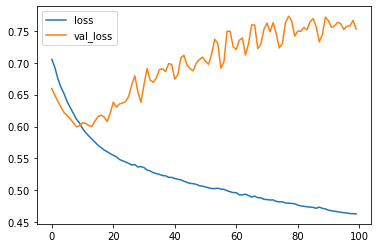

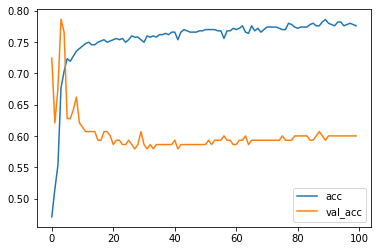

In [22]:
#Some visualizations
import matplotlib.pyplot as plt
#Loss
plt.plot(history.history['loss'],label='loss')
print('loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
#Accuracy
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [23]:
model.evaluate(test_generator)

1/1 [==============================] - 2s 2s/step - loss: 0.8426 - accuracy: 0.4545 - precision: 0.4545 - auc: 0.5315 - recall_1: 0.4545 - true_negatives_1: 30.0000


[0.8425806760787964,
 0.4545454680919647,
 0.4545454680919647,
 0.5314508676528931,
 0.4545454680919647,
 30.0]